### Import libraries

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
from skimage import io
import sys
import seaborn as sns
from scipy import spatial

In [2]:
sys.path.insert(1, "/Users/k1801626/OneDrive - King's College London/git/AFT-Alignment_by_Fourier_Transform/Python_implementation/")
import AFT_tools as AFT       

### Import data (csv tracks and images)

In [3]:
input_folder = "/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/"

In [4]:
csv_list = glob.glob(input_folder+'*Spots.csv')

print(*csv_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/merged_Spots.csv


In [5]:
image_list = glob.glob(input_folder+'ctrl/clahe*.tiff')

print(*image_list, sep="\n")

/Users/k1801626/OneDrive - King's College London/data/JP/AFT_track/ctrl/clahe_Position 6.tiff


### Load data

In [6]:
df = pd.read_csv(csv_list[0])
df.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
0,ID2560,2560,1,113788.0,446.481612,463.926373,0.0,26.0,26,190.336445,...,1850.608931,0.417613,0.884730,5.485520,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1
1,ID2435,2435,1,64912.0,186.902997,251.383041,0.0,1.0,1,143.727227,...,1103.639245,0.669551,0.961309,4.332246,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1
2,ID2563,2563,1,111268.0,432.193334,454.720643,0.0,27.0,27,188.187463,...,1845.354851,0.410564,0.845194,5.532409,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1
3,ID2437,2437,1,71143.0,230.466989,274.844695,0.0,4.0,4,150.484286,...,1161.466995,0.662717,0.959538,4.354525,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1
4,ID2565,2565,1,123560.0,441.649200,460.855612,0.0,28.0,28,198.340124,...,1885.321437,0.436928,0.854008,5.362902,Position_26_spots,siCCT8_si5,R1,siCCT8_si5_R1_Position_26_spots,1,siCCT8_si5_R1_Position_26_spots_1


In [8]:
im = io.imread(image_list[0])
im.shape

(118, 1608, 1432)

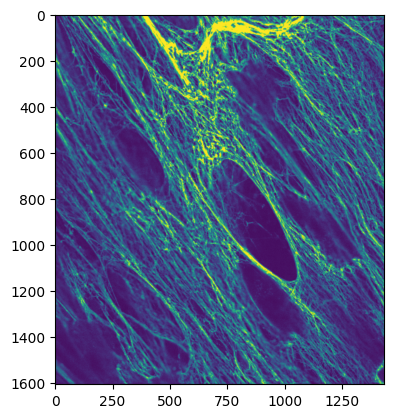

In [9]:
plt.imshow(im[0,])
plt.show()

### Run AFT
Note that this might need to be run over time

In [10]:
# AFT parameters

#### required parameters ####
window_size = 100
overlap = 0.6
neighborhood_radius = 5

#### output parameters ####
plot_overlay = False
plot_angles = False
plot_eccentricity = False
save_figures = False
data_save_path = input_folder+'output_data/'    

In [11]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im[0,], window_size, overlap, save_path = data_save_path,
                                                             plot_overlay=plot_overlay, plot_angles=plot_angles, 
                                                             plot_eccentricity=plot_eccentricity,
                                                             save_figures=data_save_path)

In [12]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(im, window_size, overlap, save_path = data_save_path,
                                                             plot_overlay=plot_overlay, plot_angles=plot_angles, 
                                                             plot_eccentricity=plot_eccentricity,
                                                             save_figures=data_save_path)

In [13]:
len(im_theta)

118

In [14]:
im_theta[16]

array([[-1.04457174, -0.95989083, -0.9433345 , -0.94495621, -0.93166605,
        -0.96252325, -0.96826252, -0.80117529, -0.55550079, -0.37984674,
        -1.37137051, -1.13092357, -0.58381914, -0.40279681, -0.43711727,
        -0.40109928,  0.0714028 , -0.16381423, -0.39996681, -0.42783617,
        -0.57252371, -0.47899968, -0.35685218],
       [-1.0838172 , -1.04060306, -0.98674446, -0.96513627, -0.9678918 ,
        -1.01921722, -1.10050841, -0.94944092, -0.7378389 , -0.51976828,
         1.35600729, -1.33966389, -0.91598156, -0.64340604, -0.50098829,
        -0.39001274, -0.40345316, -0.66711428, -0.68825867, -0.63897034,
        -0.78656361, -0.58226486, -0.67112249],
       [-1.13203322, -1.08129328, -0.9765757 , -0.95199469, -1.04889741,
        -1.01329006, -1.21111201, -1.09600682, -0.91955217, -0.67082139,
        -1.53282928, -1.3262443 , -1.00612988, -1.00576473, -0.67492541,
        -0.57033831, -0.70285778, -0.85322986, -0.73251428, -0.74914712,
        -0.92352381, -0.8825

In [15]:
y

array([  50,   50,   50,   50,   50,   50,   50,   50,   50,   50,   50,
         50,   50,   50,   50,   50,   50,   50,   50,   50,   50,   50,
         50,  110,  110,  110,  110,  110,  110,  110,  110,  110,  110,
        110,  110,  110,  110,  110,  110,  110,  110,  110,  110,  110,
        110,  110,  170,  170,  170,  170,  170,  170,  170,  170,  170,
        170,  170,  170,  170,  170,  170,  170,  170,  170,  170,  170,
        170,  170,  170,  230,  230,  230,  230,  230,  230,  230,  230,
        230,  230,  230,  230,  230,  230,  230,  230,  230,  230,  230,
        230,  230,  230,  230,  290,  290,  290,  290,  290,  290,  290,
        290,  290,  290,  290,  290,  290,  290,  290,  290,  290,  290,
        290,  290,  290,  290,  290,  350,  350,  350,  350,  350,  350,
        350,  350,  350,  350,  350,  350,  350,  350,  350,  350,  350,
        350,  350,  350,  350,  350,  350,  410,  410,  410,  410,  410,
        410,  410,  410,  410,  410,  410,  410,  4

In [16]:
26*23

598

In [17]:
len(x)

598

### Subset csv for current image

In [18]:
df.File_name.unique()

array(['siCCT8_si5_R1_Position_26_spots',
       'siCCT8_si5_R2_Position_27_spots',
       'siCCT8_si8_R1_Position_31_spots',
       'siCCT8_si8_R2_Position_33_spots', 'siCTRL_R1_Position_6_spots',
       'siCTRL_R2_Position_12_spots'], dtype=object)

In [19]:
df_subset = df.loc[df.File_name == 'siCTRL_R1_Position_6_spots']
df_subset.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
1699,ID3842,3842,0,59994.0,358.788984,464.305796,0.0,91.0,91,138.190174,...,1511.487920,0.329993,0.652224,6.170958,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1700,ID3588,3588,0,83174.0,655.321703,952.250604,0.0,40.0,40,162.715152,...,1672.325104,0.373744,0.857332,5.798528,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1701,ID3590,3590,0,84819.0,655.781933,943.489064,0.0,41.0,41,164.318703,...,1713.634716,0.362992,0.835554,5.883779,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1702,ID3846,3846,0,49197.0,352.480696,457.365264,0.0,92.0,92,125.147755,...,1273.097583,0.381489,0.714440,5.739363,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1703,ID3591,3591,0,83738.0,676.951721,975.889848,0.0,39.0,39,163.298045,...,1704.151781,0.362498,0.875368,5.887791,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0


In [61]:
trackID = 0

df_track = df_subset.loc[df_subset.TRACK_ID == trackID]
df_track = df_track.sort_values(by='FRAME')
df_track = df_track.reset_index(drop=True)
               
df_track.head()

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
0,ID3413,3413,0,60629.0,911.573447,1229.346787,0.0,0.0,0,138.891513,...,1195.991200,0.532421,0.953410,4.858222,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1,ID3411,3411,0,66787.0,915.004487,1234.594345,0.0,1.0,1,145.807809,...,1356.369409,0.456211,0.894409,5.248344,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
2,ID3416,3416,0,74314.0,920.497477,1240.365222,0.0,2.0,2,153.798329,...,1397.886325,0.477880,0.871550,5.127968,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
3,ID3402,3402,0,74854.0,924.494239,1235.758889,0.0,3.0,3,154.348392,...,1443.399506,0.451430,0.824431,5.276057,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
4,ID3415,3415,0,77758.0,921.001214,1230.766299,0.0,4.0,4,157.323433,...,1498.769990,0.434987,0.846772,5.374854,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0


### Plot track on AFT alignment vector field (overlay)

In [40]:
print(x.shape)
print(y.shape)
print(u[0].shape)
print(v[0].shape)

(598,)
(598,)
(598,)
(598,)


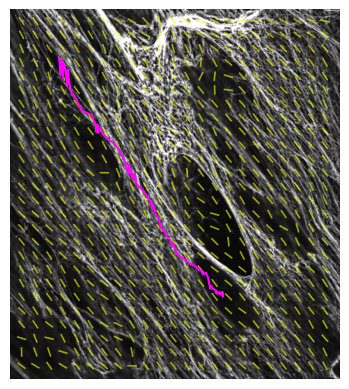

In [62]:
plt.imshow(im[0,], cmap='gray')
plt.quiver(x,y,u[0],v[0], color='yellow', pivot='mid', scale_units='xy', scale=overlap, headaxislength=0, headlength=0, width=0.005, alpha=0.6)
sns.lineplot(data=df_track, x=df_track.POSITION_X, y=df_track.POSITION_Y, color='magenta')

plt.axis('off')
plt.show()

### Work out angles between AFT (local) and track

In [72]:
time_point = 0

In [73]:
track_current = [df_track.loc[time_point, 'POSITION_X'], df_track.loc[time_point, 'POSITION_Y']]
track_next = [df_track.loc[time_point+1, 'POSITION_X'], df_track.loc[time_point+1, 'POSITION_Y']]

print(track_current)
print(track_next)

[np.float64(911.5734467471892), np.float64(1229.346786790751)]
[np.float64(915.0044866996056), np.float64(1234.594345460897)]


In [89]:
AFT_coords = np.empty(shape=(len(x),2))
AFT_coords[:,0] = x
AFT_coords[:,1] = y

In [92]:
d_closest,idx_closest = spatial.KDTree(AFT_coords).query(track_current)

print(d_closest)
print(idx_closest)

29.86584705680571
474


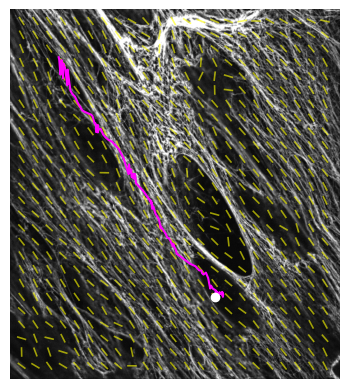

In [98]:
plt.imshow(im[0,], cmap='gray')
plt.quiver(x,y,u[0],v[0], color='yellow', pivot='mid', scale_units='xy', scale=overlap, headaxislength=0, headlength=0, width=0.005, alpha=0.6)
sns.lineplot(data=df_track, x=df_track.POSITION_X, y=df_track.POSITION_Y, color='magenta')
plt.plot(AFT_coords[idx_closest][0], AFT_coords[idx_closest][1], marker='o', color='w')

plt.axis('off')
plt.show()

In [104]:
AFT_angle = np.ravel(im_theta[0])[idx_closest]

print('Angle in rad:', AFT_angle)
print('Angle in deg:', AFT_angle*180/np.pi)
print(u[0][idx_closest])
print(v[0][idx_closest])

Angle in rad: -0.9219134138686589
Angle in deg: -52.821747691171694
15.107418334974248
-19.918983690240925


In [118]:
print(np.arctan2(v[0][idx_closest],u[0][idx_closest]))
print(np.arctan2(v[0][idx_closest],u[0][idx_closest])*180/np.pi)

-0.9219134138686589
-52.821747691171694


In [120]:
print(np.arctan(v[0][idx_closest]/u[0][idx_closest]))
print(np.arctan(v[0][idx_closest]/u[0][idx_closest])*180/np.pi)

-0.9219134138686589
-52.821747691171694


In [170]:
track_length = [track_next[0]-track_current[0], track_next[1]-track_current[1]]
track_norm = np.sqrt(track_length[0] ** 2 + track_length[1] ** 2)
track_direction = [track_length[0]/track_norm, track_length[1]/track_norm]
track_angle = np.arctan2(track_direction[1], track_direction[0])
track_angle1 = np.arctan(track_direction[1]/ track_direction[0])
    
print(track_current)
print(track_next)
print(track_length)
print(track_norm)
print(track_direction)
print(track_angle)
print(track_angle1)
print(track_angle*180/np.pi)

[np.float64(911.5734467471892), np.float64(1229.346786790751)]
[np.float64(915.0044866996056), np.float64(1234.594345460897)]
[np.float64(3.431039952416427), np.float64(5.247558670146191)]
6.26968158295971
[np.float64(0.5472430947277462), np.float64(0.8369737124144335)]
0.9917295466352624
0.9917295466352624
56.82191744062309


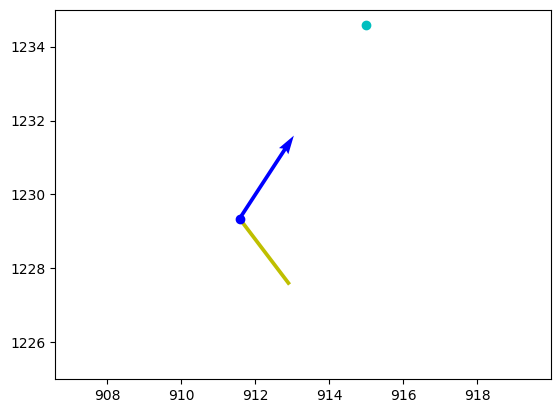

In [169]:
plt.plot(track_current[0], track_current[1], marker='o', color='b')
plt.plot(track_next[0], track_next[1], marker='o', color='c')

plt.quiver(track_current[0], track_current[1],track_direction[0], track_direction[1], color='b', scale=5) # track
plt.quiver(track_current[0], track_current[1],u[0][idx_closest],v[0][idx_closest], color='y', scale=150, headaxislength=0, headlength=0) # AFT

plt.axis('equal')

plt.ylim([1225, 1235])
plt.show()

In [173]:
AFT_track_angle = AFT_angle-track_angle
AFT_track_cos = np.cos(AFT_track_angle)

print(AFT_track_angle)
print(AFT_track_angle*180/np.pi)
print(AFT_track_cos ** 2)

-1.9136429605039211
-109.64366513179478
0.11300987527930645


In [174]:
time_point = 1

track_current = [df_track.loc[time_point, 'POSITION_X'], df_track.loc[time_point, 'POSITION_Y']]
track_next = [df_track.loc[time_point+1, 'POSITION_X'], df_track.loc[time_point+1, 'POSITION_Y']]

d_closest,idx_closest = spatial.KDTree(AFT_coords).query(track_current)
AFT_angle = np.ravel(im_theta[time_point])[idx_closest]

track_length = [track_next[0]-track_current[0], track_next[1]-track_current[1]]
track_norm = np.sqrt(track_length[0] ** 2 + track_length[1] ** 2)
track_direction = [track_length[0]/track_norm, track_length[1]/track_norm]
track_angle = np.arctan2(track_direction[1], track_direction[0])

AFT_track_angle = AFT_angle-track_angle
AFT_track_cos = np.cos(AFT_track_angle)

print(AFT_angle*180/np.pi)
print(track_angle*180/np.pi)
print(AFT_track_angle*180/np.pi)
print(AFT_track_cos ** 2)

-51.192199504261815
46.4132341380861
-97.60543364234792
0.01751662614020848


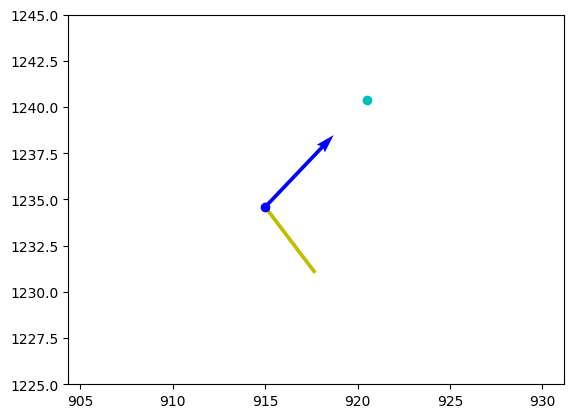

In [178]:
plt.plot(track_current[0], track_current[1], marker='o', color='b')
plt.plot(track_next[0], track_next[1], marker='o', color='c')

plt.quiver(track_current[0], track_current[1],track_direction[0], track_direction[1], color='b', scale=5) # track
plt.quiver(track_current[0], track_current[1],u[0][idx_closest],v[0][idx_closest], color='y', scale=150, headaxislength=0, headlength=0) # AFT

plt.axis('equal')

plt.ylim([1225, 1245])
plt.show()

In [90]:
AFT_coords[0]

array([50., 50.])

In [88]:
c = np.empty(shape=(len(x),2))
c[:,0] = x
c[:,1] = y
print(c)

[[  50.   50.]
 [ 110.   50.]
 [ 170.   50.]
 ...
 [1250. 1550.]
 [1310. 1550.]
 [1370. 1550.]]


In [79]:
AFT_coords = [[x], [y]]

print(AFT_coords)

[[array([  50,  110,  170,  230,  290,  350,  410,  470,  530,  590,  650,
        710,  770,  830,  890,  950, 1010, 1070, 1130, 1190, 1250, 1310,
       1370,   50,  110,  170,  230,  290,  350,  410,  470,  530,  590,
        650,  710,  770,  830,  890,  950, 1010, 1070, 1130, 1190, 1250,
       1310, 1370,   50,  110,  170,  230,  290,  350,  410,  470,  530,
        590,  650,  710,  770,  830,  890,  950, 1010, 1070, 1130, 1190,
       1250, 1310, 1370,   50,  110,  170,  230,  290,  350,  410,  470,
        530,  590,  650,  710,  770,  830,  890,  950, 1010, 1070, 1130,
       1190, 1250, 1310, 1370,   50,  110,  170,  230,  290,  350,  410,
        470,  530,  590,  650,  710,  770,  830,  890,  950, 1010, 1070,
       1130, 1190, 1250, 1310, 1370,   50,  110,  170,  230,  290,  350,
        410,  470,  530,  590,  650,  710,  770,  830,  890,  950, 1010,
       1070, 1130, 1190, 1250, 1310, 1370,   50,  110,  170,  230,  290,
        350,  410,  470,  530,  590,  650,  710, 

In [70]:
np.ravel(im_theta[0]).shape

(598,)

In [63]:
df_track.loc[time_point, 'POSITION_X']
# df_track.iloc[time_point]['POSITION_X']

np.float64(911.5734467471892)

In [42]:
df_track

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,PERIMETER,CIRCULARITY,SOLIDITY,SHAPE_INDEX,File_name_raw,Condition,experiment_nb,File_name,Repeat,Unique_ID
1735,ID3413,3413,0,60629.0,911.573447,1229.346787,0.0,0.0,0,138.891513,...,1195.991200,0.532421,0.953410,4.858222,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1734,ID3411,3411,0,66787.0,915.004487,1234.594345,0.0,1.0,1,145.807809,...,1356.369409,0.456211,0.894409,5.248344,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1740,ID3416,3416,0,74314.0,920.497477,1240.365222,0.0,2.0,2,153.798329,...,1397.886325,0.477880,0.871550,5.127968,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1730,ID3402,3402,0,74854.0,924.494239,1235.758889,0.0,3.0,3,154.348392,...,1443.399506,0.451430,0.824431,5.276057,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1739,ID3415,3415,0,77758.0,921.001214,1230.766299,0.0,4.0,4,157.323433,...,1498.769990,0.434987,0.846772,5.374854,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,ID3947,3947,0,50506.0,223.904459,220.317033,0.0,113.0,113,126.797137,...,1220.875739,0.425829,0.877715,5.432342,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1756,ID3956,3956,0,52656.0,231.892117,235.113328,0.0,114.0,114,129.484890,...,1289.990829,0.397763,0.872944,5.620728,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1761,ID3962,3962,0,46239.0,239.054790,253.433857,0.0,115.0,115,121.334214,...,1188.040321,0.411779,0.909664,5.524245,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0
1766,ID3969,3969,0,49021.0,250.183823,261.208931,0.0,116.0,116,124.900794,...,1238.194925,0.401709,0.873104,5.593052,Position_6_spots,siCTRL,R1,siCTRL_R1_Position_6_spots,1,siCTRL_R1_Position_6_spots_0


In [ ]:
df.File_name.unique()